# Imports:

In [1]:
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd

import pandas_datareader as pdr
from pandas_datareader import data

pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size' : 16, 'font.family' : 'sans'})
sm, med, lg = 10, 15, 20
plt.rc('font', size = sm)          # controls default text sizes
plt.rc('axes', titlesize = med)     # fontsize of the axes title
plt.rc('axes', labelsize = med)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = sm)    # fontsize of the tick labels
plt.rc('ytick', labelsize = sm)    # fontsize of the tick labels
plt.rc('legend', fontsize = sm)    # legend fontsize
plt.rc('figure', titlesize = lg)  # fontsize of the figure title
plt.rc('axes', linewidth=2)
plt.style.use('ggplot')

import seaborn as sns
sns.set()

from scipy.optimize import minimize
import itertools
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels import regression

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import yfinance as yf
from yahoofinancials import YahooFinancials
from urllib.request import urlopen
import requests

import locale, sys 
from datetime import date, datetime, timedelta
import time, csv, json

from IPython.display import IFrame
# ![img](images/paintcarelogo.png)

import warnings
warnings.filterwarnings('ignore')

print('\n          * * * All imports have been loaded without Issue * * * \n')


          * * * All imports have been loaded without Issue * * * 



# Quantitative Value Strategy

## ALPHA & BETA MARKET ANALYSIS

In [2]:
start='2019-1-1'
end = datetime.now()

ticker = ['SPY', 'TSLA']

yf.pdr_override()

df = pd.DataFrame()
for t in ticker:
    df[t] = data.get_data_yahoo(
        t, start, end)['Close']

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,SPY,TSLA
Date,,
2019-01-02,250.179993,62.023998
2019-01-03,244.210007,60.071999
2019-01-04,252.389999,63.537998
2019-01-07,254.380005,66.991997
2019-01-08,256.769989,67.070000


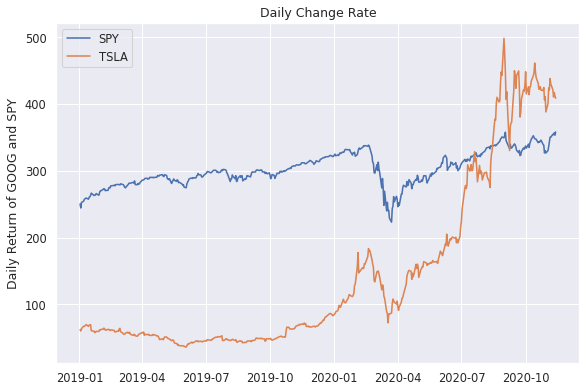

,SPY,TSLA,SPYchange,TSLAchange
Date,,,,
2019-01-02,250.179993,62.023998,NaN,NaN
2019-01-03,244.210007,60.071999,-0.023863,-0.031472
2019-01-04,252.389999,63.537998,0.033496,0.057697
2019-01-07,254.380005,66.991997,0.007885,0.054361
2019-01-08,256.769989,67.070000,0.009395,0.001164


In [3]:
lst = list(df.columns)
df1 = df.copy()
for l in lst:
    df1[str(l) + 'change'] = df[l].pct_change()[1:]

fig = plt.subplots(figsize=(9,6), dpi = 75)
plt.plot(df1[['SPY', 'TSLA']])
plt.ylabel("Daily Return of GOOG and SPY")
plt.legend(df.columns[:2])
plt.title('Daily Change Rate')
plt.show();
df1.head()

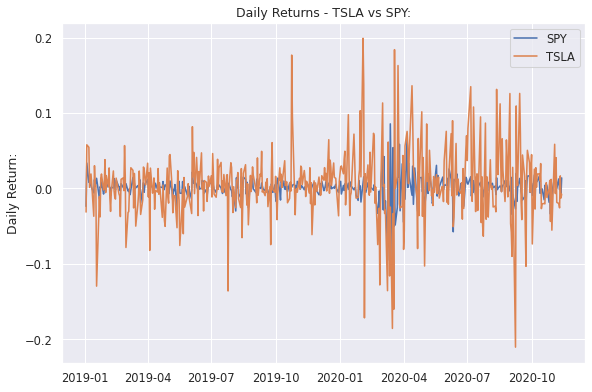

In [4]:
plt.figure(figsize=(9, 6), dpi = 75)

plt.plot(df1[['SPYchange', 'TSLAchange']])
plt.ylabel("Daily Return:")
plt.title('Daily Returns - ' + \
    str(ticker[1]) + ' vs ' + str(ticker[0])+ ':')
plt.legend(ticker)
plt.show()

# Capital Asset Pricing Model or CAPM (How to Calculate Beta)

In [8]:
df_capM = df1.drop(['SPYchange','TSLAchange'], axis = 1)

Y = df_capM.pop('SPY').values       # SPY
X = df_capM.values                  # TSLA

print(X[:3], '\n\n', Y[:3], '\n')
df_capM.head()

[[62.02399826]
 [60.0719986 ]
 [63.5379982 ]] 

 [250.17999268 244.21000671 252.38999939] 



,TSLA
Date,
2019-01-02,62.023998
2019-01-03,60.071999
2019-01-04,63.537998
2019-01-07,66.991997
2019-01-08,67.070000


In [11]:
def linreg(x,y):
    x = sm.add_constant(x)
    model=regression.linear_model.OLS(y,x).fit()
    
    # REMOVE THE CONSTANT
    x = x[:,1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)

X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha


print(f'\n   Constructing The  Linear Regression Model For: \n        \
            {ticker[1]} \n          vs the benchmark index ticker \n                    {ticker[0]}: \n\n \
      > The Alpha Score = {alpha}.\n\n       > The Beta Score = {beta}.')

print("\n\n ALPHA ~ \n  * demonstrates how good/bad a stock preformed vs a benchmark index over a set standard of time. \n  * high alpha is ALWAYS GOOD. \n\n BETA ~ \n    * indicates the volatility of a stock's price in relationship to the market as a whole. \n")


   Constructing The  Linear Regression Model For: 
                    TSLA 
          vs the benchmark index ticker 
                    SPY: 

       > The Alpha Score = 281.7439550809128.

       > The Beta Score = 0.14148045939206003.


 ALPHA ~ 
  * demonstrates how good/bad a stock preformed vs a benchmark index over a set standard of time. 
  * high alpha is ALWAYS GOOD. 

 BETA ~ 
    * indicates the volatility of a stock's price in relationship to the market as a whole. 



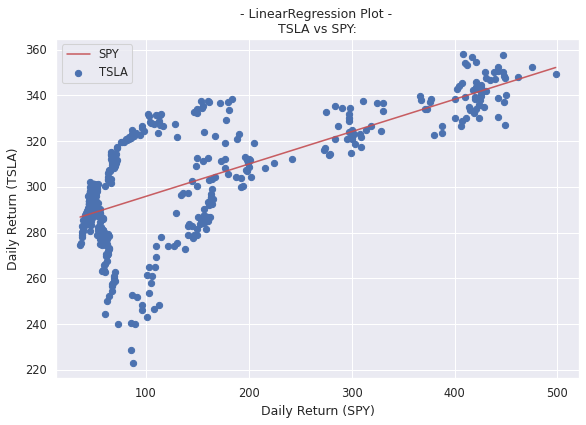

In [12]:
fig = plt.subplots(figsize=(9,6), dpi = 75)

plt.scatter(X, Y,) # PLOTS RAW DATA
plt.xlabel('Daily Return ('+ticker[0]+')')
plt.ylabel('Daily Return ('+ticker[1]+')')
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.title('- LinearRegression Plot - \n' + str(ticker[1]) + " vs " + str(ticker[0]) + ':')
plt.legend(df1.columns)
plt.show();